# 4 多层感知机

## 4.1 多层感知机

在 [3.1 线性回归](3.ipynb) 中介绍了线性模型。一些情况下，可以通过简单的预处理使得线性合理，但是大部分时候无法成立。

因此考虑到通过在网络中加入一个或多个 **隐藏层** 来克服线性模型的限制，使其能处理更普遍的函数关系类型。

将许多全连接层堆叠在一起，每一层都输出到上面的层，直到生成最后的输
出。共L层，把前L−1层看作表示，把最后一层看作线性预测器，这种架构通常称为 **多层感知机（multilayer perceptron）**，通常缩写为 **MLP** 。

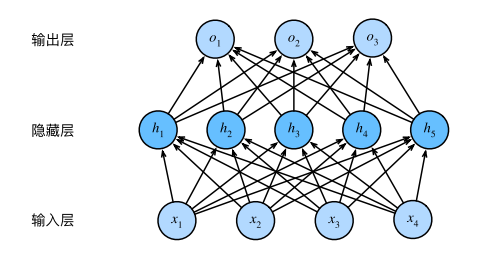

#### 隐藏层
隐藏层即是输出层和输入层之间不可见的那些层。


#### 非线性的实现
为了发挥多层架构的潜力，需要在仿射变换之后对每个隐藏单元应用 **非线性的** **激活函数（activation function）** ，一般记作 $\sigma$ 。激活函数的输出 $\sigma(\cdot)$ 被称为活性值。激活函数使得多层感知机不会退化成线性模型。

例如，单隐藏层的多层感知机：
$$\textbf{H}=\sigma(\textbf{XW}^{(1)}+\textbf{b}^{(1)})$$
$$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}$$

本质上是神经元学习近似，通过使用更深的网络能更容易地逼近许多函数。



#### 激活函数

激活函数的作用：
- 如上所讲，引入非线性。
- 决定神经元是否被激活，即是否产生有意义的的非零的输出信号传递给下一层。典型例子是ReLU函数，在 $z \leq 0$ 时不激活神经元。
- 影响梯度流动（反向传播），即其导数也参与到梯度流动过程中。

常见的激活函数：

1. **ReLU函数**：

    $$\text{ReLU}(x)=\max(x,0)$$

    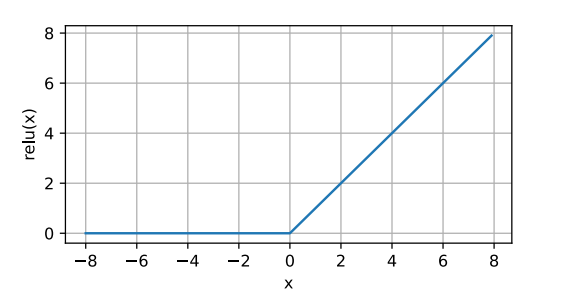

    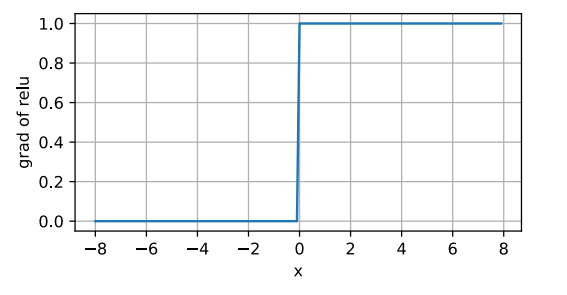

    实现简单，求导表现得特别好：要么让参数消失，要么让参数通过，使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题。

2. **sigmoid函数**：

    sigmoid通常称为挤压函数（squashing function），它将范围 $R$ 中的任意输入压缩到区间（0, 1）中的某个值：

    $$\text{sigmoid(x)}=\frac{1}{1+\exp(-x)}$$

    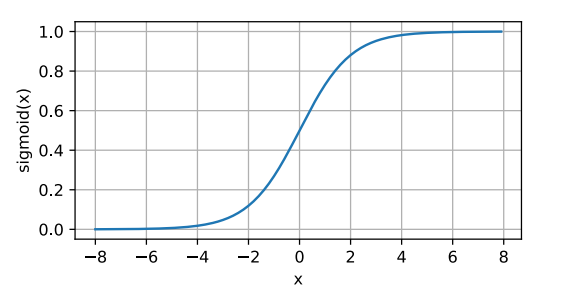

    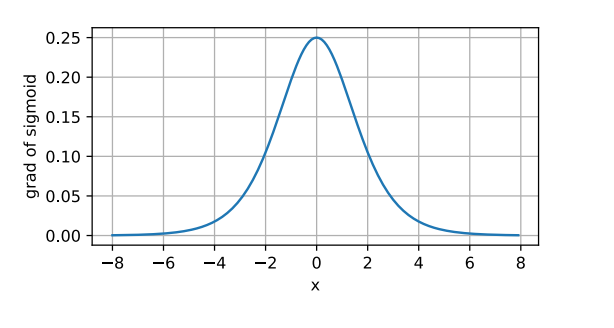

    sigmoid被广泛用作二元分类问题输出单元上的激活函数，可以视为softmax的特例。

3. **tanh函数**：

    与sigmoid函数类似，tanh(双曲正切)函数也能将其输入压缩转换到区间(‐1, 1)上：

    $$\text{tanh}(x)=\frac{1-\exp(-2x)}{1+\exp(-2x)}$$

    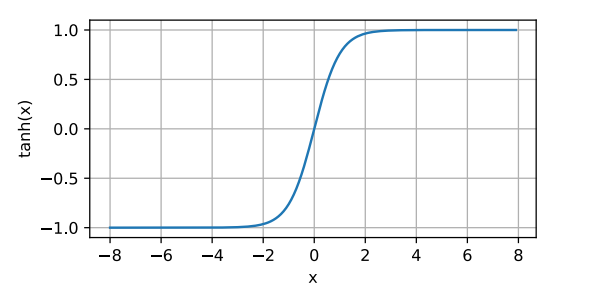

    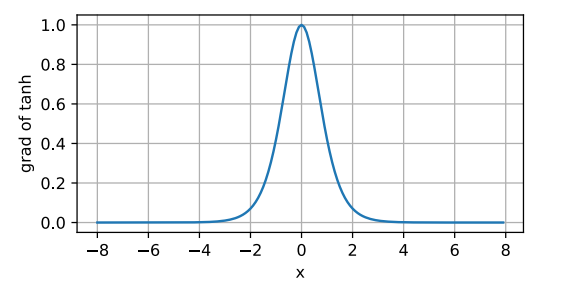

    

## 4.4 模型选择

**欠拟合（underfitting）** ：机器学习模型过于简单，无法捕捉训练数据中的基本模式和规律，表现为模型在训练集和验证集上的误差都很严重。
**过拟合（overfitting）** ：将模型在训练数据上拟合的比在潜在分布中更接近的现象。
**正则化（regularization）** ：用于对抗过拟合的技术。在模型训练过程中， **对模型的复杂度施加惩罚** 。通过向模型的损失函数添加一个额外的“惩罚项”，鼓励模型学习更简单、更平滑的模式，而不是去死记硬背训练数据。

**训练误差（training error）** ：模型在训练数据集上计算得到的误差。
**泛化误差（generalization error）** ：模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。将模型应用于一个独立的测试集来估计泛化误差。

**早停（early stopping）** ：在模型训练过程中， **持续监控模型在验证集上的性能** 。一旦发现验证集性能不再提升甚至开始下降（表明模型开始过拟合训练集），就 **提前终止训练过程** 。

**验证集（validation set）** ：
- 模型调优：用于在训练过程中调整模型的超参数
- 监控训练过程：用于检测过拟合，在每个训练周期结束后评估验证集上的性能，如损失、准确率，并与训练集性能对比
- 模型选择：在机器学习中，我们通常在评估几个候选模型后选择最终的模型。验证集能够比较不同模型的性能，选择表现最好的


*注：当训练数据稀缺时，可以采用 **K折交叉验证** 。原始训练数据被分成K个不重叠的子集，然后执行K次模型训练和验证，每次在K-1个子集上进行训练，并在剩余的一个子集上进行验证。*


**测试集（test set）** ：
在模型训练和调优完全结束后，对模型的最终泛化能力进行无偏估计，是从原始数据中 **独立划分** 出来的、在整个训练和调优过程中 **从未被模型或其训练过程见过** 的数据。

## 4.5 权重衰减

**权重衰减（weight decay）** 是最广泛使用的正则化的技术之一，它通常也被称为 $L_2$ 正则化。

一种简单的方法是通过线性函数 $f(\textbf{x})=\textbf{w}^T \textbf{x}$ 中的权重向量的某个范数来度量其复杂性，例如 $||\textbf{w}||^2$ 。要保证权重向量比较小，最常用方法是将其范数作为惩罚项加到最小化损失的问题中。将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚项之和。现在，如果我们的权重向量增长的太大，我们的学习算法可能会更集中于最小化权重范数 $||\textbf{w}||^2$ 。

原损失函数：
$$L(\textbf{w}, b)=\frac{1}{n}\sum_{i=1}^n \frac{1}{2}(\textbf{w}^T x^{(i)}+b-y^{(i)})^2$$
加入 $L_2$ 正则化的损失函数：
$$L(\textbf{w}, b)+\frac{\lambda}{2}||\textbf{w}||^2$$
$L_2$ 正则化回归的小批量随机梯度梯度下降：
$$\textbf{w} \leftarrow (1-\eta\lambda)\textbf{w} - \frac{\eta}{\mathcal{B}} \sum_{i\in \mathcal{B}}\textbf{x}^{(i)}(\textbf{w}^T\textbf{x}^{(i)}+b-y^{(i)})$$